### "Mashing" two images by generating images from weighted z vectors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.data_handling import VAE_data
from src.encoder import VAE
from src.net import build_vae_64 as net

data = VAE_data()
data.load_images_list_from_directory('./data/img_align_celeba/')

autoencoder = VAE(net, img_size=64)
autoencoder.load_weights_from_checkpoint('./saved_models/celebA_64/model')

INFO:tensorflow:Restoring parameters from ./saved_models/celebA_64/model


In [2]:
def plot_z_steps(autoencoder, img1, img2):
    z1 = autoencoder.get_z(img1)
    z2 = autoencoder.get_z(img2)
    f = plt.figure(figsize=(14,3))
    plt.subplot(1,9,1)
    plt.imshow(img1.reshape((64,64,3)))
    plt.axis('off')
    for i, alpha in enumerate([0, 0.25, 0.4, 0.5, 0.56, 0.75, 1.0]):    
        z3 = z1 * (1-alpha) + z2 * alpha 
        mashed = autoencoder.get_img_from_z(z3)
        plt.subplot(1,9,i+2)
        plt.imshow(np.clip(mashed.reshape((64,64,3)), 0, 1))
        plt.axis('off')
    plt.subplot(1,9,9)
    plt.imshow(img2.reshape((64,64,3)))
    plt.axis('off')
    plt.show()

### Some hand picked samples

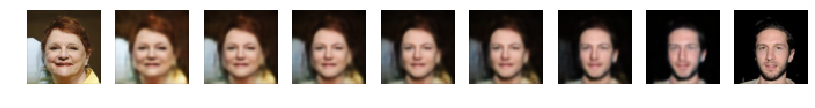

In [3]:
plot_z_steps(autoencoder, data.get_image(75695), data.get_image(103910))

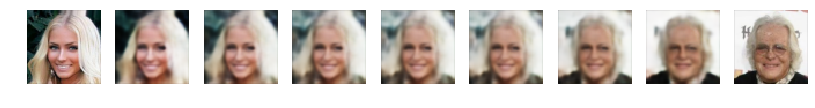

In [4]:
plot_z_steps(autoencoder, data.get_image(125), data.get_image(10326))

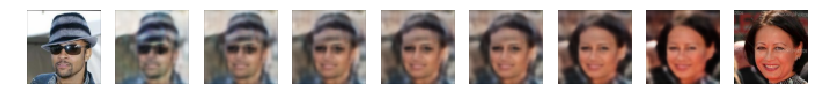

In [5]:
plot_z_steps(autoencoder, data.get_image(149027), data.get_image(3910))

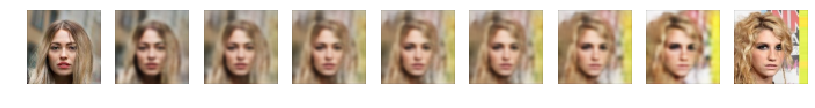

In [6]:
plot_z_steps(autoencoder, data.get_image(1264), data.get_image(13033))

### Some randomally selected samples

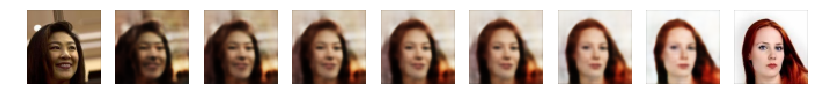

In [8]:
idx1, idx2 = np.random.randint(data.Nimages, size=2)
plot_z_steps(autoencoder, data.get_image(idx1), data.get_image(idx2))

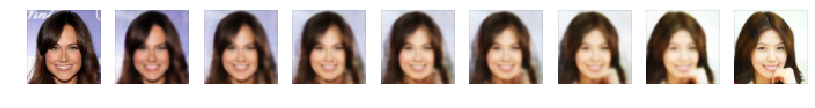

In [23]:
idx1, idx2 = np.random.randint(data.Nimages, size=2)
plot_z_steps(autoencoder, data.get_image(idx1), data.get_image(idx2))

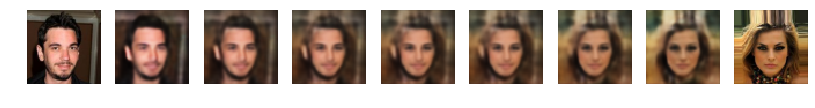

In [25]:
idx1, idx2 = np.random.randint(data.Nimages, size=2)
plot_z_steps(autoencoder, data.get_image(idx1), data.get_image(idx2))

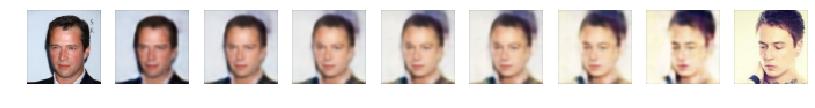

In [26]:
idx1, idx2 = np.random.randint(data.Nimages, size=2)
plot_z_steps(autoencoder, data.get_image(idx1), data.get_image(idx2))